In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np



In [2]:
elu24 = pd.read_csv("C://Users//annal//Documents//NLP//andmed//elu24.csv",sep=";", encoding="UTF-8")
elu24 = elu24.drop(['Unnamed: 0','X.1'],axis=1)
elu24 = elu24.rename(columns={'X': 'id', 'pealkirjade_list': 'pealkiri', 'urls_list':'url', 'rubriik_list': 'tag', 
                   'kuupaev_list':'kuupaev', 'sisu':'artikkel'}) 
elu24['portaal'] = 'elu24'
elu24 = elu24.reindex(columns=['id', 'portaal', 'pealkiri', 'url', 'tag', 'kuupaev', 'artikkel'])
del elu24['id']
elu24.head()


,portaal,pealkiri,url,tag,kuupaev,artikkel
0,elu24,82-aastasest Pae tänava pommimehest on saanud ...,https://www.postimees.ee/7233550/82-aastasest-...,Kirev elu,"Eile, 19:00",Möödunud aasta novembris vabanes Viru vanglast...
1,elu24,Reporter: Miks Kätlin Kalamets kaubanduskeskus...,https://www.postimees.ee/7233924/reporter-miks...,Uudised,"Eile, 18:36","Kohtu ees seisis 29-aastane naine, kes aasta t..."
2,elu24,Reporter: Tallinn-Helsingi tunneli eestvedajat...,https://www.postimees.ee/7233930/reporter-tall...,Uudised,"Eile, 18:36","Eesti ja Soome leppisid kokku, et Tallinn-Hels..."
3,elu24,Reporter: Jõutõstja ja vegan? 15 aastat London...,https://www.postimees.ee/7233943/reporter-jout...,Uudised,"Eile, 18:27","Gert Koovit on mees, kes viimased 25 aastat ak..."
4,elu24,Armupommitamine: mis see on ning miks see suht...,https://www.postimees.ee/7233709/armupommitami...,Suhted & seks,"Eile, 18:26",Oleme Sõbrannas varem päris palju kirjutanud e...


In [3]:
postimees = pd.read_csv("C://Users//annal//Documents//NLP//andmed//postimees.csv",sep=";",encoding="UTF-8")
postimees = postimees[['X','pealkiri','url','rubriik','kuupaev','sisu']]
postimees = postimees.rename(columns={'X': 'id', 'rubriik': 'tag', 'sisu':'artikkel'}) 
postimees['portaal'] = 'postimees'
postimees = postimees.reindex(columns=['id', 'portaal', 'pealkiri', 'url', 'tag', 'kuupaev', 'artikkel'])
del postimees['id']
postimees.head()

C:\Users\annal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,portaal,pealkiri,url,tag,kuupaev,artikkel
0,postimees,Vabamu järgmine feministlik lugemisring on öko...,https://www.postimees.ee/7234409/vabamu-jargmi...,Uudised,"Täna, 09:42",Vabamu korraldab alates märtsist Noorte Vabamu...
1,postimees,Vene laskesuusatajale mõisteti kaheksa aasta p...,https://www.postimees.ee/7234398/vene-laskesuu...,Laskesuusatamine,"Täna, 09:36",Lõuna-Koread esindavale venelasest laskesuusat...
2,postimees,"Elu õppetunnid isalt pojale: raamat annab nõu,...",https://www.postimees.ee/7234382/elu-oppetunni...,Uued raamatud,"Täna, 09:24",Million Mindseti kirjastatud raamat «Rikas aed...
3,postimees,Arco Vara hakkab maksma kvartaalset dividendi,https://www.postimees.ee/7234368/arco-vara-hak...,Investor,"Täna, 09:24",Kinnisvarakontsern Arco Vara otsustas kasutuse...
4,postimees,Otse Postimehest <U+27E9> Kas Soome valitsus v...,https://www.postimees.ee/7234380/kas-soome-val...,TV,"Täna, 09:24",Soome valitsus on eelarvestrateegia aruteludeg...


In [4]:
paevaleht = pd.read_csv("C://Users//annal//Documents//NLP//andmed//paevaleht.csv",encoding="UTF-8")
paevaleht = paevaleht.rename(columns={'kpv': 'kuupaev', 'teema': 'tag', 'link':'url', 'sisu': 'artikkel'}) 
paevaleht['portaal'] = 'paevaleht'
paevaleht = paevaleht.reindex(columns=['portaal', 'pealkiri', 'url', 'tag', 'kuupaev', 'artikkel'])
paevaleht.head()

,portaal,pealkiri,url,tag,kuupaev,artikkel
0,paevaleht,Ivo Pilving: põhiseadus ei luba viirusetõrjega...,https://epl.delfi.ee/artikkel/89418725/ivo-pil...,arvamus,"31.03.2020, 17:00",Selle kõige taustal ei mõjunud kindlasti julgu...
1,paevaleht,KOROONAKOGEMUS | Viive Näslund: praegu viiks k...,https://epl.delfi.ee/artikkel/89416951/koroona...,arvamus,"31.03.2020, 15:00",Selle perioodi jooksul olen pidanud suusareisi...
2,paevaleht,"Reet Marii Rokk: riik ja ettevõtjad, ärge unus...",https://epl.delfi.ee/artikkel/89414427/reet-ma...,arvamus,"31.03.2020, 13:01","Tõesti, mitte ainult Eestis, vaid üle terve ma..."
3,paevaleht,Aivar Voog: praegust kriisi eristab eelmisest ...,https://epl.delfi.ee/artikkel/89403089/aivar-v...,arvamus,"31.03.2020, 00:15",Koroonapandeemia tõttu vallandunud ostupaanika...
4,paevaleht,David Vseviov: võimuritest muinasjutuvestjad e...,https://epl.delfi.ee/artikkel/89402583/david-v...,arvamus,"31.03.2020, 00:10","Vahel juhtub, et mõni ootamatu asi (koroonavii..."


In [5]:
err = pd.read_csv("C://Users//annal//Documents//NLP//andmed//err.csv",encoding = "UTF-8")
err = err.rename(columns={'portal_name': 'portaal', 'date': 'kuupaev', 'link':'url', 'header':'pealkiri', 'article': 'artikkel'}) 
err = err.reindex(columns=['portaal', 'pealkiri', 'url', 'tag', 'kuupaev', 'artikkel'])
err.head()

,portaal,pealkiri,url,tag,kuupaev,artikkel
0,err,Koolinoored näitavad ERM-is kiirmoe mõju keskk...,https://kultuur.err.ee/1608202522/koolinoored-...,Muuseumid,05.05.2021 21:36,ERM-i külastaja läbib kogu T-särgi elutee. Sel...
1,err,"Inglismaa, Šoti ja Walesi kohalikud valimised ...",https://www.err.ee/1608202519/inglismaa-soti-j...,Välismaa,05.05.2021 21:34,"Ligi 48 miljonit inimest otsustavad, kes võiks..."
2,err,Omavalitsused tõstavad munitsipaalkorterite üüri,https://www.err.ee/1608202507/omavalitsused-to...,Eesti,05.05.2021 21:25,Kuna munitsipaalkorterite üür on iga omavalits...
3,err,Mai keskel võtavad vaktsineerimiskeskused ja h...,https://www.err.ee/1608202513/mai-keskel-votav...,Eesti,05.05.2021 21:22,"Perearstid said haigekassalt kirja, et alates ..."
4,err,"Levadia alistas kindlalt Tuleviku, Trans võiti...",https://sport.err.ee/1608202510/levadia-alista...,Jalgpall,05.05.2021 21:16,Levadia keskkaitsja Volodymyr Baienko saadeti ...


In [6]:
ohtuleht = pd.read_csv("C://Users//annal//Documents//NLP//andmed//ohtuleht.csv", encoding = "UTF-8")
ohtuleht = ohtuleht.rename(columns={'portal_name': 'portaal', 'date': 'kuupaev', 'link':'url', 'header':'pealkiri', 'article': 'artikkel'}) 
ohtuleht = ohtuleht.reindex(columns=['portaal', 'pealkiri', 'url', 'tag', 'kuupaev', 'artikkel'])
ohtuleht.head()

,portaal,pealkiri,url,tag,kuupaev,artikkel
0,ohtuleht,Pühapäeval kimbutab hoovihm (1),https://www.ohtuleht.ee/1034587/puhapaeval-kim...,NaN,täna 19:27,Vihmane ilm.Sel pühepäeval on oodata küll kuni...
1,ohtuleht,GALERII | Tammsaare parki kogunesid Palestiina...,https://www.ohtuleht.ee/1034577/galerii-tammsa...,NaN,täna 16:01,Tallinnas kogunesid täna pärastlõunal Tammsaar...
2,ohtuleht,Rüütelmaa orkestrite koondamisest: kui kaotata...,https://www.ohtuleht.ee/1034583/ruutelmaa-orke...,NaN,täna 15:16,KaitseväeorkesterKlassikaraadio saade „Helikaj...
3,ohtuleht,Eesti on viimase 20 aastaga tõusnud Euroopa Li...,https://www.ohtuleht.ee/1034574/eesti-on-viima...,NaN,täna 12:01,Viimase 20 aastaga on isikliku sõiduauto kasut...
4,ohtuleht,Politsei otsib Harjumaal kadunud 84aastast Ger...,https://www.ohtuleht.ee/1034573/politsei-otsib...,NaN,täna 11:46,Politsei palub kaasabi selgitamaks Haaberstis ...


In [7]:
telegram = pd.read_csv("C://Users//annal//Documents//NLP//andmed//telegram.csv",encoding = "UTF-8")
telegram = telegram.rename(columns={'kpv': 'kuupaev', 'teema': 'tag','link':'url', 'sisu': 'artikkel'}) 
telegram['portaal'] = 'telegram'
telegram = telegram.reindex(columns=['portaal', 'pealkiri', 'url', 'tag', 'kuupaev', 'artikkel'])
telegram.head()
len(telegram)

9387

In [8]:
uued_uudised = pd.read_csv("C://Users//annal//Documents//NLP//andmed//telegram.csv",encoding = "UTF-8")
uued_uudised = uued_uudised.rename(columns={'kpv': 'kuupaev', 'teema': 'tag','link':'url', 'sisu': 'artikkel'}) 
uued_uudised['portaal'] = 'uued_uudised'
uued_uudised = uued_uudised.reindex(columns=['portaal', 'pealkiri', 'url', 'tag', 'kuupaev', 'artikkel'])
uued_uudised.head()
len(uued_uudised)

9387

In [9]:
uudised = pd.concat([elu24, postimees, paevaleht, err, ohtuleht, telegram, uued_uudised])

In [10]:
len(uudised)

235210

In [34]:
np.random.seed(10)

elu24_vaike = elu24.sample(n=1000)
postimees_vaike = postimees.sample(n=1000)
paevaleht_vaike = paevaleht.sample(n=1000)
err_vaike = err.sample(n=1000)
telegram_vaike = telegram.sample(n=1000)
uued_uudised_vaike=uued_uudised.sample(n=1000)
uudised_vaike = pd.concat([elu24_vaike, postimees_vaike, paevaleht_vaike, err_vaike, 
                           telegram_vaike, uued_uudised_vaike])

In [35]:
uudised_vaike.head()

,portaal,pealkiri,url,tag,kuupaev,artikkel
48246,elu24,Reporter: 170 meetrit ja 920 trepiastet! Telet...,https://www.postimees.ee/6563758/reporter-170-...,Reporter,"7.04.2019, 17:01","Aasta jooksul toimub maailmas 24 võistlust, ku..."
35659,elu24,"3 olulist kohta kodus, millele enne müüki põhj...",https://www.postimees.ee/6813593/3-olulist-koh...,Kodustiil,"30.10.2019, 10:38",Kui kavatsete oma kodu müüki panna ning kutsut...
14768,elu24,"Kolm linna, kolm proffi: Eesti tippkokad testi...",https://www.postimees.ee/7057670/kolm-linna-ko...,Kodustiil,"9.09.2020, 13:37",Eesti esimesel suurel kööginädalal panevad tip...
30643,elu24,INSTASTAARI PIHTIMUS <U+27E9> Üleöö kuulsaks s...,https://www.postimees.ee/6874635/uleoo-kuulsak...,Elu24,"16.01.2020, 22:32",28-aastane sotsiaalmeedia staar Samantha Marie...
38541,elu24,"Tõsielu Downton Abbeys on peretüli, milles kas...",https://www.postimees.ee/6779844/tosielu-downt...,Kirev elu,"17.09.2019, 09:38",Menusarjas «Downton Abbey» ja hiljuti kinno jõ...


In [36]:
### Naive Bayes

In [37]:
uudised_vaike.portaal.value_counts()


paevaleht       1000
err             1000
uued_uudised    1000
telegram        1000
elu24           1000
postimees       1000
Name: portaal, dtype: int64

In [38]:
# convert label to a numeric variable

df_uudised = uudised_vaike.copy()
df_uudised['portaal'] = df_uudised.portaal.map({'postimees':0, 'elu24':1, 'err':2, 'paevaleht':3,
                                                'telegram':4, 'uued_uudised':5, 'ohtuleht':6})
df_uudised.head()

,portaal,pealkiri,url,tag,kuupaev,artikkel
48246,1,Reporter: 170 meetrit ja 920 trepiastet! Telet...,https://www.postimees.ee/6563758/reporter-170-...,Reporter,"7.04.2019, 17:01","Aasta jooksul toimub maailmas 24 võistlust, ku..."
35659,1,"3 olulist kohta kodus, millele enne müüki põhj...",https://www.postimees.ee/6813593/3-olulist-koh...,Kodustiil,"30.10.2019, 10:38",Kui kavatsete oma kodu müüki panna ning kutsut...
14768,1,"Kolm linna, kolm proffi: Eesti tippkokad testi...",https://www.postimees.ee/7057670/kolm-linna-ko...,Kodustiil,"9.09.2020, 13:37",Eesti esimesel suurel kööginädalal panevad tip...
30643,1,INSTASTAARI PIHTIMUS <U+27E9> Üleöö kuulsaks s...,https://www.postimees.ee/6874635/uleoo-kuulsak...,Elu24,"16.01.2020, 22:32",28-aastane sotsiaalmeedia staar Samantha Marie...
38541,1,"Tõsielu Downton Abbeys on peretüli, milles kas...",https://www.postimees.ee/6779844/tosielu-downt...,Kirev elu,"17.09.2019, 09:38",Menusarjas «Downton Abbey» ja hiljuti kinno jõ...


In [39]:
# define X and y
X = df_uudised.pealkiri
y = df_uudised.portaal

In [40]:
# split into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#print(X_train.shape)
#print(X_test.shape)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(X_train.shape)
print(X_test.shape)

(4800,)
(1200,)


In [42]:
y_train.value_counts()


0    800
4    800
1    800
5    800
2    800
3    800
Name: portaal, dtype: int64

In [43]:
#X_train.head()

In [44]:
### vectorizing SMS data
# instantiate the vectorizer
vect = CountVectorizer(encoding='unicode')


In [45]:
# learn training data vocabulary, then create document-term matrix
X_train_dtm = vect.fit_transform(X_train.values.astype('U'))


In [46]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test.values.astype('U'))
X_test_dtm

<1200x17155 sparse matrix of type '<class 'numpy.int64'>'
	with 6618 stored elements in Compressed Sparse Row format>

In [48]:
## Examining the tokens and their counts

# store token names
X_train_tokens = vect.get_feature_names()

X_train_dtm.toarray()

# count how many times EACH token appears across ALL messages in X_train_dtm
X_train_counts = np.sum(X_train_dtm.toarray(), axis=0)
X_train_counts

# create a DataFrame of tokens with their counts
counts = pd.DataFrame({'token':X_train_tokens, 'count':X_train_counts})
counts.sort_values(['count'], ascending=False).head(40)

,token,count
3738,ja,701
9619,on,620
1741,eesti,337
1806,ei,315
92,27e9,297
16009,video,169
4661,kas,165
6079,kui,155
6081,kuidas,141
9581,oma,132


In [161]:
pd.DataFrame({'token':X_train_tokens, 'count':X_train_counts}).sort_values('count')


In [162]:
# train a Naive Bayes model using X_train_dtm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [163]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [164]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.f1_score(y_test, y_pred_class, average='weighted'))
print(metrics.precision_score(y_test, y_pred_class, average='weighted'))
print(metrics.recall_score(y_test, y_pred_class, average='weighted'))


0.4052777777777778
0.4031957662419901
0.40646723079431374
0.4052777777777778


In [165]:
# confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 688  332  299  319   79   83]
 [ 146 1368   45  121   54   66]
 [ 306  137  928  302   69   58]
 [ 222  220  222  970   93   73]
 [  44   82   31   55  231 1357]
 [  38   96   37   65 1372  192]]


In [166]:
# predict (poorly calibrated) probabilities
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([1.86723646e-02, 8.34983004e-04, 9.69837794e-01, ...,
       9.99852267e-01, 9.53571364e-01, 2.08695844e-03])

In [167]:
#print(metrics.roc_auc_score(y_test, y_pred_prob))

In [168]:
# print message text for the false positives
print(X_test[y_test < y_pred_class][0:5])


30307                  Meditsiin on ainult masohhistidele?
9907     FOTOD <U+27E9> Soomlased ehitavad järvel maail...
260      Vasta Tervise Arengu Instituudi küsitusele: ta...
39859    INTERVJUU KOOLIJÜTSIGA <U+27E9> Mis tunne on t...
2905     Edukalt roheline: Saksa küla teenib taastuvene...
Name: pealkiri, dtype: object


In [169]:
df = pd.DataFrame({
    'y_test': y_test,
    'y_pred_class': y_pred_class
})

df.to_csv("C:\\Users\\annal\\Documents\\NLP\\andmekraapimine\\NB.csv", index=False, encoding='utf-8')

In [170]:
#from sklearn.metrics import confusion_matrix
#import matplotlib.pyplot as plt
#import seaborn as sns


#conf_mat = confusion_matrix(y_test, y_pred_class)
#fig, ax = plt.subplots(figsize=(10,10))
#sns.heatmap(conf_mat, annot=True, fmt='d',
#            xticklabels=uudised_vaike.portaal, yticklabels=uudised_vaike.portaal)
#plt.ylabel('Actual')
#plt.xlabel('Predicted')
#plt.show()

In [171]:
X_test.iloc[10]

'Peeter Espak: teadus, rahvus ja müüt'

In [172]:
y_test.iloc[10]

5

In [173]:
y_pred_class[10]

4

In [174]:
# import/instantiate/fit
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)

C:\Users\annal\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1000000000.0)

In [175]:
y_pred_class_log = logreg.predict(X_test_dtm)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]

In [176]:
print(metrics.accuracy_score(y_test, y_pred_class_log))


0.39305555555555555


In [177]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_dtm, y_train)
y_pred_knn = knn.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_knn))


0.22194444444444444


In [178]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_dtm, y_train)
y_pred_svm = svm.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_svm))


0.3978703703703704


In [179]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

forest.fit(X_train_dtm, y_train)
y_pred_forest = forest.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_forest))


0.3373148148148148


In [180]:
#from sklearn.metrics import confusion_matrix
#conf_mat = confusion_matrix(y_test, y_pred)
#fig, ax = plt.subplots(figsize=(10,10))
#sns.heatmap(conf_mat, annot=True, fmt='d',
#            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
#plt.ylabel('Actual')
#plt.xlabel('Predicted')
#plt.show()

In [ ]:
# Part II

In [ ]:
col = ['portaal', 'pealkiri']
df = uudised_vaike[col]
df = df[pd.notnull(df['pealkiri'])]
df.columns = ['portaal', 'pealkiri']
df['category_id'] = df['pealkiri'].factorize()[0]
category_id_df = df[['pealkiri', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'pealkiri']].values)
df.head()

In [ ]:
#import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(8,6))
#df.groupby('category_id').pealkiri.count().plot.bar(ylim=0)
#plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2',
                        encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(df.pealkiri).toarray()
labels = df.category_id
features.shape

In [ ]:
#from sklearn.feature_selection import chi2
#import numpy as np
#N = 2
#for pealkiri, category_id in sorted(category_to_id.items()):
#  features_chi2 = chi2(features, labels == category_id)
#  indices = np.argsort(features_chi2[0])
#  feature_names = np.array(tfidf.get_feature_names())[indices]
#  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#  print("# '{}':".format(pealkiri))
#  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
#  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['pealkiri'], df['portaal'], random_state = 0)
count_vect = CountVectorizer()


In [ ]:
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()


In [ ]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [ ]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    KNeighborsClassifier()
    
]



In [ ]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()


In [ ]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)


In [ ]:
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
#from sklearn.metrics import confusion_matrix
#conf_mat = confusion_matrix(y_test, y_pred)
#fig, ax = plt.subplots(figsize=(10,10))
#sns.heatmap(conf_mat, annot=True, fmt='d',
#            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
#plt.ylabel('Actual')
#plt.xlabel('Predicted')
#plt.show()

In [ ]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:

model = KNeighborsClassifier()


In [ ]:
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
metrics.accuracy_score(y_test, y_pred)

[]

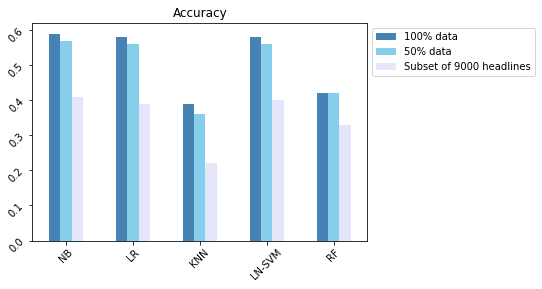

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
a = {'NB': {'100% data': 0.59, '50% data': 0.57, 'Subset of 9000 headlines': 0.41},
    'LR': {'100% data': 0.58, '50% data': 0.56, 'Subset of 9000 headlines': 0.39},
    'KNN': {'100% data': 0.39, '50% data': 0.36, 'Subset of 9000 headlines': 0.22},
    'LN-SVM': {'100% data': 0.58, '50% data': 0.56, 'Subset of 9000 headlines': 0.4},
    'RF': {'100% data': 0.42, '50% data': 0.42, 'Subset of 9000 headlines': 0.33}}

index = ['NB', 'LR', 'KNN', 'SVM', 'RF']

df = pd.DataFrame(a).T

ax = df.plot.bar(color=['steelblue', 'skyblue', 'lavender'])
ax.tick_params(labelrotation=45)
ax.set_title("Accuracy",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()